In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from scipy import sparse
from scipy.sparse import linalg

In [2]:
rsp = np.load('../../Data/simple_pCT/Phantoms/Head/RSP.npy')

In [3]:
scale = 1
phantom = np.pad(rsp[:,:,rsp.shape[2]//2], ((30*scale,30*scale), (100*scale, 100*scale)))

x = phantom.flatten()
RSP_shape = phantom.shape[:2]
print(RSP_shape)

(190, 1226)


In [4]:
num_angles = 179
num_offsets = 1
num_spotxs = 130
MLP_angles_spotx = sparse.load_npz('../../Data/simple_pCT/MLP/MLP_angles{:d}_offset{:d}_spotx{:d}_exact_{:d}_{:d}.npz'.format(num_angles, num_offsets, num_spotxs, RSP_shape[0], RSP_shape[1]))

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/simple_pCT/MLP/MLP_angles179_offset1_spotx130_exact_190_1226.npz'

In [13]:
b_w = MLP_angles_spotx @ x
wepl = np.reshape(b_w, (num_spotxs, num_angles))

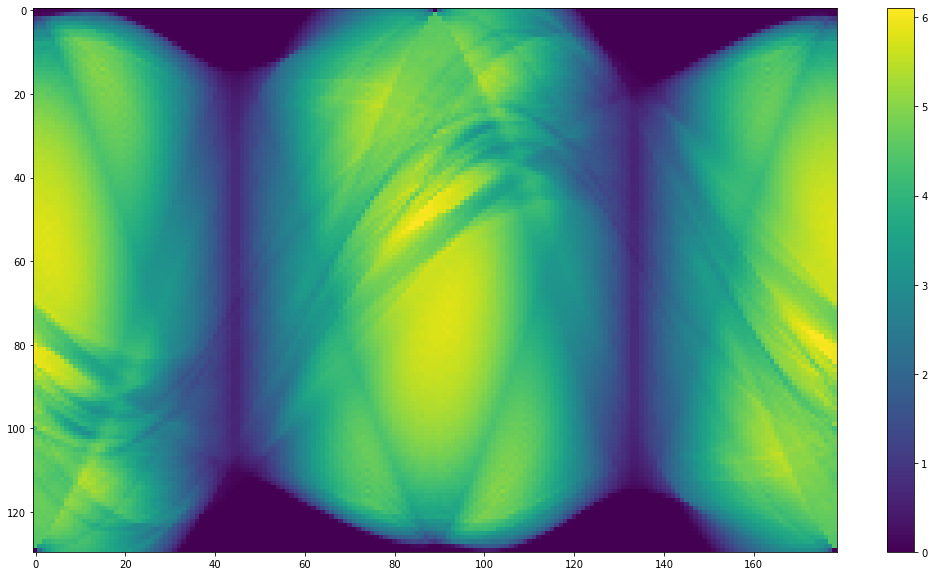

In [14]:
plt.figure(figsize=(18,10))
plt.imshow(wepl, aspect='auto')
plt.colorbar()
plt.show()

In [17]:
np.save('../../Data/simple_pCT/WEPL/WEPL_angles{:d}_offset{:d}_spotx{:d}_exact_{:d}_{:d}.npy'.format(num_angles, num_offsets, num_spotxs, RSP_shape[0], RSP_shape[1]), wepl)